<a href="https://colab.research.google.com/github/SichenPa221/Robot_localization/blob/main/robot_localization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

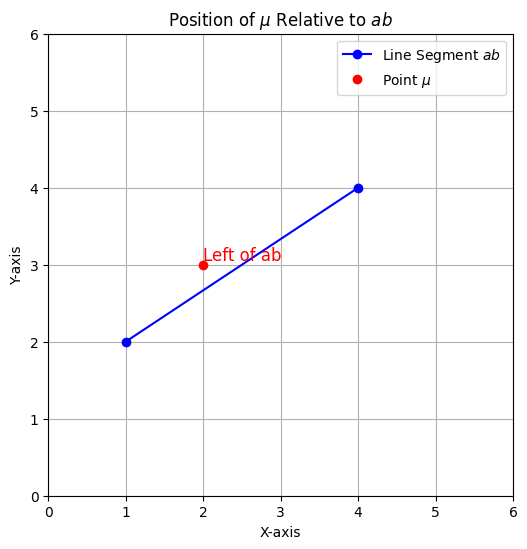

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define points a, b, and mu
a = np.array([1, 2])  # Coordinates of point a
b = np.array([4, 4])  # Coordinates of point b
mu = np.array([2, 3]) # Coordinates of point mu

# Calculate the determinant
det = np.linalg.det(np.vstack((b - a, mu - a)))

# Create a plot
plt.figure(figsize=(6, 6))

# Plot the line segment ab
plt.plot([a[0], b[0]], [a[1], b[1]], 'bo-', label='Line Segment $ab$')

# Plot point mu
plt.plot(mu[0], mu[1], 'ro', label='Point $\mu$')

# Add text to indicate the side of mu
if det > 0:
    plt.text(mu[0], mu[1], 'Left of ab', fontsize=12, color='red', verticalalignment='bottom')
else:
    plt.text(mu[0], mu[1], 'Right of ab', fontsize=12, color='red', verticalalignment='bottom')

# Set plot limits and labels
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Show the plot
plt.grid(True)
plt.title('Position of $\mu$ Relative to $ab$')
plt.show()


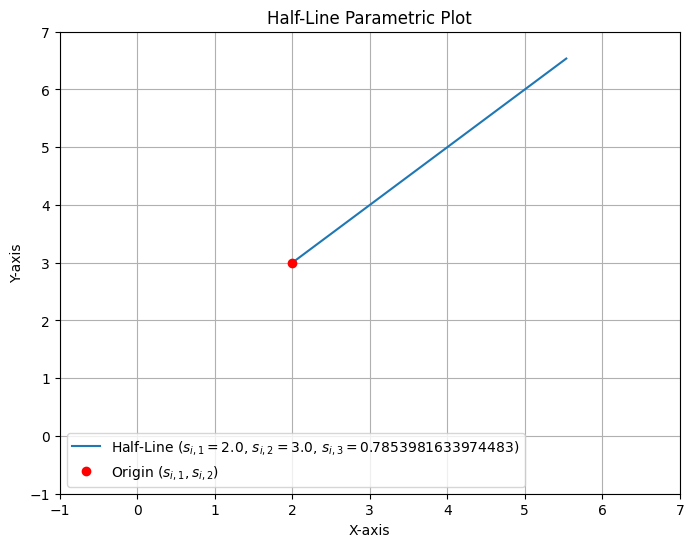

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
s_i = np.array([2.0, 3.0, np.pi/4.0])  # Origin (x, y, orientation)
t_values = np.linspace(0, 5, 100)      # Values of t for plotting the half-line

# Calculate the coordinates of points on the half-line using the parametric equations
x1 = s_i[0] + t_values * np.cos(s_i[2])
x2 = s_i[1] + t_values * np.sin(s_i[2])

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x1, x2, label=f'Half-Line ($s_{{i,1}}={s_i[0]}$, $s_{{i,2}}={s_i[1]}$, $s_{{i,3}}={s_i[2]}$)')

# Mark the origin point
plt.plot(s_i[0], s_i[1], 'ro', label='Origin ($s_{i,1}, s_{i,2}$)')

# Set plot limits and labels
plt.xlim(-1, 7)
plt.ylim(-1, 7)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Show the plot
plt.grid(True)
plt.title('Half-Line Parametric Plot')
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
class Robot_Room_location:
  walls = np.array([])
  nb_walls = 0

  p = np.array([])

  sensors = np.array([])
  nb_sensors = 0

  def __init__(self,p):
    # Location of walls (global frame)
    self.walls = np.array([[[0,0],[0,4]],
                  [[0,4],[3,4]],
                  [[3,4],[3,3]],
                  [[3,3],[5,3]],
                  [[5,3],[5,0]],
                  [[5,0],[0,0]]])

    print('shape of wall',self.walls.shape)

    self.nb_walls = self.walls.shape[0]

    # Location of sensors (robot frame)
    self.sensors = np.array([[0.5,0.25,np.pi/4],
              [0.5,-0.25,-np.pi/4],
              [-0.5,0.25,3*np.pi/4],
              [-0.5,-0.25,-3*np.pi/4]])

    self.nb_sensors = self.sensors.shape[0]

    # Position and orientation of robot frame
    self.p = p

    self.y = self.get_sensor_readings()


  # Gets sensor location and orientation in global frame
  def sensor_glob_frame(self):
    s = np.zeros([self.nb_sensors,3])

    for m in range(self.nb_sensors):
      s[m,0] = self.p[0]+self.sensors[m,0]*np.cos(self.p[2])-self.sensors[m,1]*np.sin(self.p[2])
      s[m,1] = self.p[1]+self.sensors[m,0]*np.sin(self.p[2])+self.sensors[m,1]*np.cos(self.p[2])
      s[m,2] = self.sensors[m,2] + self.p[2]

    return s
  # Check whether sensor on right side of wall
  def visible(self,s,wall):
      a_b = wall[1]-wall[0]
      a_s = s[0:2] - wall[0]
      if (a_b[0]*a_s[1]-a_b[1]*a_s[0]<0):
          return 1
      else:
          return 0
  # Get Sensor Reading
  def get_sensor_readings(self):
    # potential intersections
    x = np.zeros(2)

    # candidate distances hete we have 4 sense, so the candidate distance (4*n)
    d = np.zeros([self.nb_sensors,self.nb_walls])

    # simulated distances we get a matrix (4*1)
    ym = np.zeros(self.nb_sensors)

    s = self.sensor_glob_frame()

    print('sensor_glob_frame', s)

    for i in range(self.nb_sensors):
      print('Sensor ',i, ' wave ')
      for m in range(self.nb_walls):
          if self.visible(s[i,:],self.walls[m]): # here, we indicate the detect condition
              a = self.walls[m,0]
              b = self.walls[m,1]

              t_prime = ((a[0]-s[i,0])*np.sin(s[i,2])-(a[1]-s[i,1])*np.cos(s[i,2])) \
                        /((a[0]-b[0])*np.sin(s[i,2])-(a[1]-b[1])*np.cos(s[i,2]))

              t = ((a[0]-s[i,0])*(a[1]-b[1])-(a[1]-s[i,1])*(a[0]-b[0])) \
                  /((a[1]-b[1])*np.cos(s[i,2])-(a[0]-b[0])*np.sin(s[i,2]))

              if ((t>=0) & (t_prime>=0) & (t_prime <=1)):
                  print ('hits wall ',self.walls[m])
                  x[0] = s[i,0] + t*np.cos(s[i,2])
                  x[1] = s[i,1] + t*np.sin(s[i,2])
                  print(' at ', x)

                  d[i,m] = np.sqrt((x[0]-s[i,0])**2+(x[1]-s[i,1])**2)
              else:
                  d[i,m] = np.Infinity

          else:
              d[i,m] = np.Infinity

    ym = np.min(d,1)

    return ym

        # Plots
  def plot(self):
      # Walls
      for m in range(self.nb_walls):
          plt.plot(self.walls[m,:,0], self.walls[m,:,1], 'b', linestyle="-")

      # Sensors
      s = self.sensor_glob_frame()
      for i in range(self.nb_sensors):
          plt.plot([s[i,0],s[i,0] + self.y[i]*np.cos(s[i,2])], \
                    [s[i,1],s[i,1] + self.y[i]*np.sin(s[i,2])], 'ro', linestyle="--")

      plt.axis('square')
      plt.show()





shape of wall (6, 2, 2)
sensor_glob_frame [[ 3.05978341  2.55581107  1.78539816]
 [ 3.4805189   2.28565992  0.21460184]
 [ 2.5194811   1.71434008  3.35619449]
 [ 2.94021659  1.44418893 -1.35619449]]
Sensor  0  wave 
hits wall  [[0 4]
 [3 4]]
 at  [2.74501073 4.        ]
Sensor  1  wave 
hits wall  [[5 3]
 [5 0]]
 at  [5.         2.61684313]
Sensor  2  wave 
hits wall  [[0 0]
 [0 4]]
 at  [0.         1.16519877]
Sensor  3  wave 
hits wall  [[5 0]
 [0 0]]
 at  [3.25498927e+00 2.22044605e-16]
sensor_glob_frame [[ 3.05978341  2.55581107  1.78539816]
 [ 3.4805189   2.28565992  0.21460184]
 [ 2.5194811   1.71434008  3.35619449]
 [ 2.94021659  1.44418893 -1.35619449]]
Sensor  0  wave 
hits wall  [[0 4]
 [3 4]]
 at  [2.74501073 4.        ]
Sensor  1  wave 
hits wall  [[5 3]
 [5 0]]
 at  [5.         2.61684313]
Sensor  2  wave 
hits wall  [[0 0]
 [0 4]]
 at  [0.         1.16519877]
Sensor  3  wave 
hits wall  [[5 0]
 [0 0]]
 at  [3.25498927e+00 2.22044605e-16]


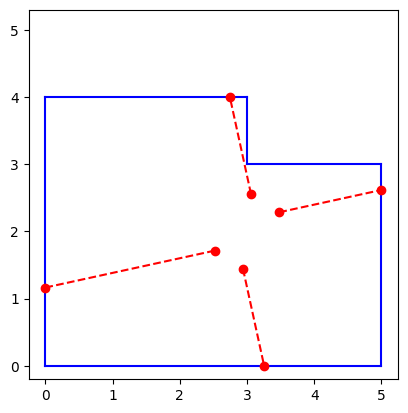

Simulated distances :  [1.47809455 1.55515438 2.57863165 1.47809455]


In [11]:
if __name__ == "__main__":
  p_star = np.array([3,2,1.0])

  myproblem = Robot_Room_location(p_star)

  ym = myproblem.get_sensor_readings()

  myproblem.plot()

  print('Simulated distances : ',ym)

## Question 2

In [ ]:
y_ba = np.array([1.06,2.48,2.12,2.12])

class find_location:
  delat = 0.01

  target = np.array([])

  p = np.array([])

  def __init__(self,p, target):


